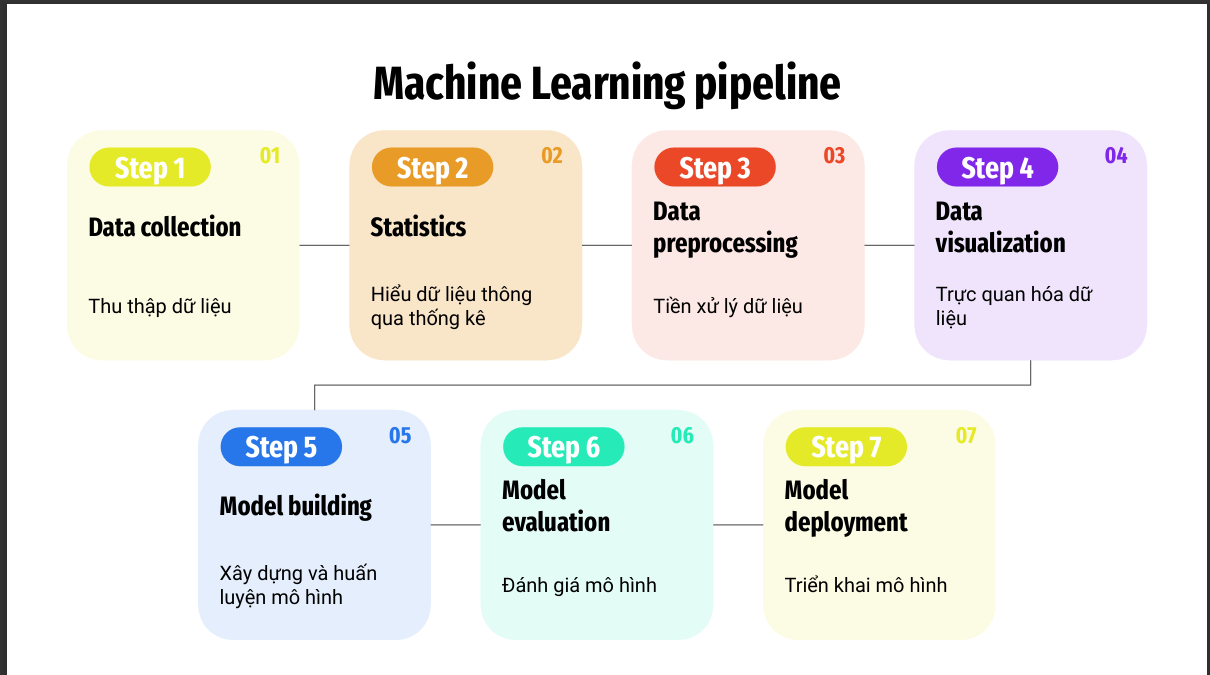

#Step 2: Statistics
- Diabetes dataset
- How data looks like
- Check each feature’s data type
- Statistical Summary of Data
- Category distribution

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd

diabetes = pd.read_csv("/content/gdrive/MyDrive/1_Data_Science_Machine_Learning/TaiLieu/datasets/diabetes.csv", delimiter=",")



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.head()
diabetes.dtypes
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


phân biệt mode , median , mean
- mean là trung bình
- median là trung vị (có lẻ phần tử thì sẽ có 1 phần tử ở giữa - nó cũng là median, chẵn phần tử thì có 2 ptu - cộng 2 đứa nó vào và chia 2 ra median)
- mode : là thằng nào có tần xuất xuất hiện nhiều nhất

In [ ]:
count_data = diabetes.groupby("Outcome").size() # nhóm và thống kê tần xuất các giá trị của 1 cột
print(count_data)

Outcome
0    500
1    268
dtype: int64


# Step 3 : Khi dữ liệu bị thiếu
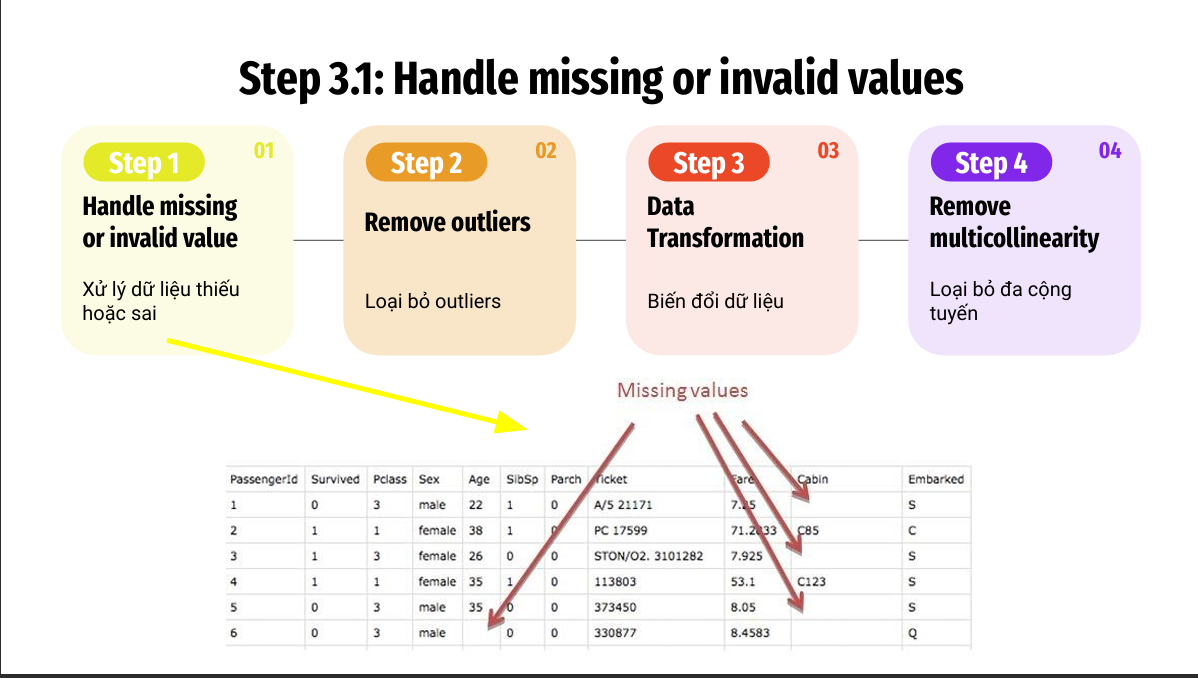

# Cách xử lý
- Step 1 :
  + Nếu ô khuyết < 5% số lượng data thì drop luôn
  + Ngược lại thì phải tìm cách để điền vào các ô trống
  + nếu 1 column trống quá nhiều thì có thể xóa luôn column đó
  
- Step 2 :
  + Phải xét outliers ảnh hưởng tốt hay xấu đến model trước
  + Remove outliers : xóa đi những điểm quá khác biệt (bạn phải xem các outliers đó có tác dụng gì ví dụ như bạn có 1 dataset về bệnh ung thư - thì những điểm outlaiers chính là bệnh nhân mà bạn cần phải chuẩn đoán - nên sẽ không bỏ đc)


- Step 3 :     


# Step 3

# Step 3.1 : Tiền xử lý numerical features - cho data dạng số
- tại sao cần dùng nó : vì trong model cái features nào có scale lớn hơn thì nó sẽ ưu tiên hơn vì vậy cần phải dùng các tiền xử lý để nó đối xử vs các features công bằng vs nhau
- 2 cái tiền xử lý tiêu biểu trong numerical features

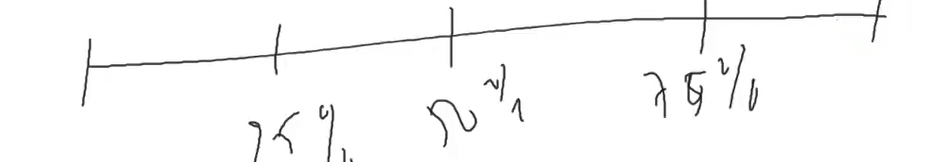


In [ ]:
# 1 : MinMaxScaler
# MinMaxScaler thực hiện scale dữ liệu về khoảng [0,1]
# Giữ được phân phối ban đầu của dữ liệu, chỉ thay đổi khoảng giá trị
# Phù hợp khi:
#     +  Dữ liệu không có outliers
#     +  Cần giá trị nằm trong khoảng xác định (VD: input cho neural network)
#     +  Dữ liệu có phân phối không chuẩn


# ví dụ trong cái data 2 chiều của bạn , các có features có scale tờ 0 -> 1 , có cái lại có scale từ 100 đến 200 , vì vậy ta phải đổi cái cột 100 đến 200 về khoảng 0 -> 1 để các features nó có scale gần nhau và model sẽ đối xử cổng bằng với các features
from sklearn.preprocessing import MinMaxScaler

## công thức
## X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
## X_scaled = X_std * (max - min) + min


Scaler_Test1 = MinMaxScaler(feature_range=(0,1))
before = diabetes[["Pregnancies"]].values
after = Scaler_Test1.fit_transform(diabetes[["Pregnancies"]])
for b,a in zip (before, after):
  print("Before : {} .  After: {}".format(b,a))



Before : [6] .  After: [0.35294118]
Before : [1] .  After: [0.05882353]
Before : [8] .  After: [0.47058824]
Before : [1] .  After: [0.05882353]
Before : [0] .  After: [0.]
Before : [5] .  After: [0.29411765]
Before : [3] .  After: [0.17647059]
Before : [10] .  After: [0.58823529]
Before : [2] .  After: [0.11764706]
Before : [8] .  After: [0.47058824]
Before : [4] .  After: [0.23529412]
Before : [10] .  After: [0.58823529]
Before : [10] .  After: [0.58823529]
Before : [1] .  After: [0.05882353]
Before : [5] .  After: [0.29411765]
Before : [7] .  After: [0.41176471]
Before : [0] .  After: [0.]
Before : [7] .  After: [0.41176471]
Before : [1] .  After: [0.05882353]
Before : [1] .  After: [0.05882353]
Before : [3] .  After: [0.17647059]
Before : [8] .  After: [0.47058824]
Before : [7] .  After: [0.41176471]
Before : [9] .  After: [0.52941176]
Before : [11] .  After: [0.64705882]
Before : [10] .  After: [0.58823529]
Before : [7] .  After: [0.41176471]
Before : [1] .  After: [0.05882353]
Bef

In [ ]:
# 2 : StandardScaler
# StandardScaler chuẩn hóa dữ liệu về phân phối chuẩn với mean=0 và std=1 theo công thức:
# khaonrg dữ liệu nó cho ra sẽ từ [-3, 3]
# Chuyển đổi dữ liệu về phân phối chuẩn
# Phù hợp khi:
#     + Thuật toán yêu cầu dữ liệu phân phối chuẩn (như Linear Regression, Neural Network)
#     + Dữ liệu có outliers (vì ít nhạy cảm với outliers hơn MinMaxScaler)
#     + Các features có đơn vị đo khác nhau

## Công thức
## z = (x - u) / s
from sklearn.preprocessing import StandardScaler

Scaler_Test2 = StandardScaler()
before = diabetes[["Pregnancies"]].values
after = Scaler_Test1.fit_transform(diabetes[["Pregnancies"]])
for b,a in zip (before, after):
  print("Before : {} .  After: {}".format(b,a))

Before : [6] .  After: [0.35294118]
Before : [1] .  After: [0.05882353]
Before : [8] .  After: [0.47058824]
Before : [1] .  After: [0.05882353]
Before : [0] .  After: [0.]
Before : [5] .  After: [0.29411765]
Before : [3] .  After: [0.17647059]
Before : [10] .  After: [0.58823529]
Before : [2] .  After: [0.11764706]
Before : [8] .  After: [0.47058824]
Before : [4] .  After: [0.23529412]
Before : [10] .  After: [0.58823529]
Before : [10] .  After: [0.58823529]
Before : [1] .  After: [0.05882353]
Before : [5] .  After: [0.29411765]
Before : [7] .  After: [0.41176471]
Before : [0] .  After: [0.]
Before : [7] .  After: [0.41176471]
Before : [1] .  After: [0.05882353]
Before : [1] .  After: [0.05882353]
Before : [3] .  After: [0.17647059]
Before : [8] .  After: [0.47058824]
Before : [7] .  After: [0.41176471]
Before : [9] .  After: [0.52941176]
Before : [11] .  After: [0.64705882]
Before : [10] .  After: [0.58823529]
Before : [7] .  After: [0.41176471]
Before : [1] .  After: [0.05882353]
Bef

# So sánh hai phương pháp:
- MinMaxScaler:
    + Ưu điểm: Dễ hiểu, giữ được zero values, phù hợp với dữ liệu không có outliers
    + Nhược điểm: Nhạy cảm với outliers
    + nó sẽ tính tất cả các khoảng từ 2 đầu mút
- StandardScaler:
    + Ưu điểm: Ít bị ảnh hưởng bởi outliers, phù hợp với nhiều thuật toán ML
    + Nhược điểm: Không giữ được zero values, khó giải thích kết quả hơn
    + chỉ tính ở 50 % để tránh các outlayers
- RobustScaler
    + tính từ 25% -> 75% phù hợp cho bài toán nhiều outliers (vì các outliers ở hết 2 đầu mút)
    
- Lựa chọn phương pháp phù hợp:
    + Sử dụng MinMaxScaler khi:
        + Cần giá trị trong khoảng xác định
        + Dữ liệu không có outliers
        + Cần giữ giá trị 0

    + Sử dụng StandardScaler khi:
        + Thuật toán yêu cầu dữ liệu phân phối chuẩn
        + Dữ liệu có outliers
        + Features có đơn vị đo khác nhau

- Mở rộng : RobustScaler
    + sẽ dùng tốt cho trường hợp bộ data có nhiều outliers
    + tại owr 2 cái trên vẫn tính trung vị , trung bình và phương sai , đối vs nó thì những cái outliers sẽ nằm ở 2 đầu và giá trị của nó sẽ xét trong khoảng 25% -> 75% nên rất phù hợp cho những bộ dataset nhiều outliers (nó sẽ làm giảm ảnh hưởng của các outliers)
    

# Đối với dữ liệu dạng phân loại ta sẽ có 2 loại
+ ordinal features
  + dữ liệu dạng category có phân cấp với nhau (ý nghĩa : phân bậc , phân tằng với các giá trị khác nhau)


+ nominal features
  + Cũng là dạng category nhưng nó không đơn giản như ordinal
  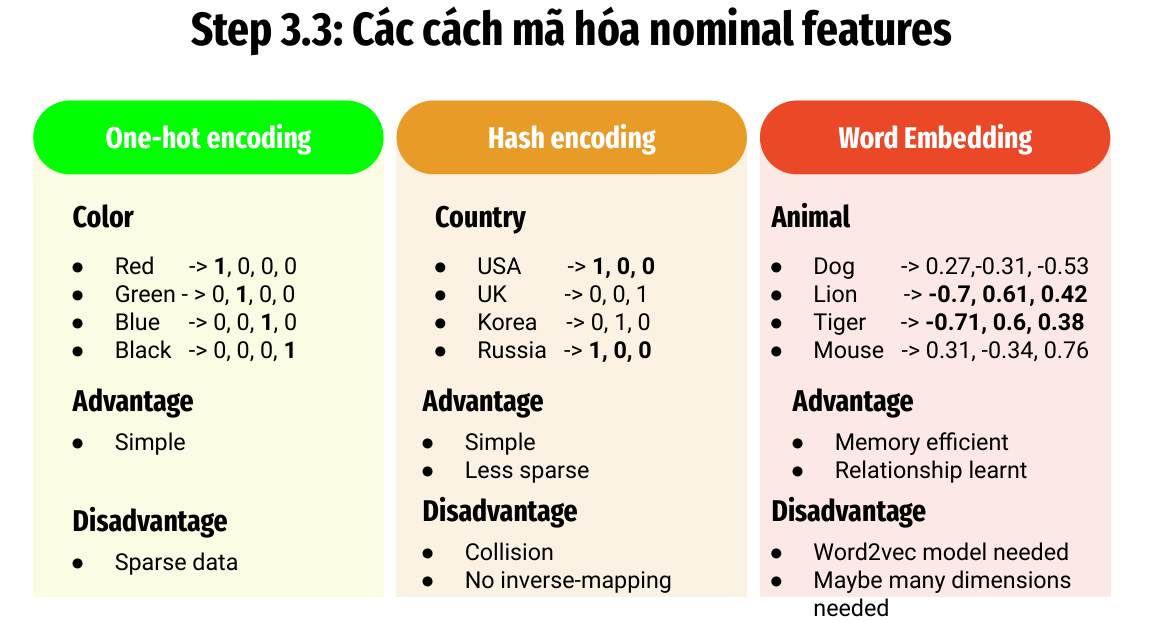

In [2]:
# ordinal features
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

before = pd.DataFrame(["XL", "L", "S", "M", "XS", "XS","L", "M"])
values = ["XS", "S", "M", "L", "XL"] # [0, 1, 2, 3,  4] - index
Ordscaler = OrdinalEncoder(categories=[values])
after = Ordscaler.fit_transform(before)
for b, a in zip (before.values, after):
  print("Before : {} . After : {}".format(b,a)) # in ra các phần tử trong before và vị trí của chúng trong values



Before : ['XL'] . After : [4.]
Before : ['L'] . After : [3.]
Before : ['S'] . After : [1.]
Before : ['M'] . After : [2.]
Before : ['XS'] . After : [0.]
Before : ['XS'] . After : [0.]
Before : ['L'] . After : [3.]
Before : ['M'] . After : [2.]


# Đối với nominal features
- Kỹ thuật One-hot encoding
  + xem cột đó có bao nhiêu giá trị khác nhau thì với mỗi giá trị sẽ mã hóa thành 1 vector có ngần đấy phần tử - các phần tử khác = 0, chính nó = 1
  + ví dụ có 1 features là màu sắc
     Red   -> 1, 0, 0, 0
     Green -> 0, 1, 0, 0
     Blue  -> 0, 0, 1, 0
     Black -> 0, 0, 0, 1
  + Advantage (ưu điểm) : simple (đơn giản)
  + Disadvantage (nhược điểm) : Sparse data (dữ liệu bị thưa)
  + trong Machine learning - dữ liệu 0 khá là vô nghĩa và ngta cần nhiều dữ liệu #0


- Kỹ thuật Hash encoding - mã hóa băm
  + ưu điểm :
      + simple , less sparse( đơn giản , dữ liệu cũng đỡ bị thưa hơn )
  + nhược điểm :    
      + collision : (đụng độ) - 2 cái input nhưng cùng ra 1 output (nếu collision nhỏ thoi thì nhma vẫn có thể chấp nhận)
      + no inverse-mapping (đối với các kỹ thuật ở trên đều có thể suy ngược lại từ output về input còn cái này thì không )
      + ví dụ :        
        USA    -> 1,0,0
        UK     ->  0,0,1
        Korea  -> 0,1,0
        Russia -> 1,0,0


- Kỹ thuật Word Embedding
  + mượn ý tưởng từ nlp
  + ý tưởng : số hóa dữ liệu bằng vector
  + ưu điểm
    + memory efficient : biểu diễn dữ liệu hiểu quả hơn (các con số giờ đã # 0)
    + Relationship learnt : model có thể học được mối quan hệ giữa các từ
      + kiểu trong 1 bài báo các từ nào hay xuất hiện với nhau sẽ được số hóa gần như tương đương nhau

  + nhược điểm :    
    + Word2vec model needed ( bạn sẽ cần 1 model Word2vec - chuyển đổi 1 từ thành vector)
    + Maybe many dimensions needed (cần rất nhiều không gian nhiều chiều)


  + Ví dụ : (data sẽ kiểu v )
    + Dog   -> 0.27, -0.31 , -0.53
    + Lion  -> -0.7, 0.61, 0,42
    + Tiger -> 0.71, 0.6, 0.38
    + mouse -> 0.31, -0.34, 0.76
